In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline
%run 'src/EDA.py'

In [4]:
df = pd.read_csv('data/boston15-19.csv')

In [5]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192056106,562,Other Burglary,BURGLARY - OTHER - NO FORCE,C6,186,NaN,2019-07-20 21:49:00,2019,7,Saturday,21,Part One,MASSACHUSETTS AVE,42.325538,-71.065796,"(42.32553801, -71.06579592)"
1,I192056104,3115,Investigate Person,INVESTIGATE PERSON,C11,342,NaN,2019-07-20 20:07:00,2019,7,Saturday,20,Part Three,GENEVA AVE,42.301351,-71.067965,"(42.30135087, -71.06796465)"
2,I192056102,3301,Verbal Disputes,VERBAL DISPUTE,C11,373,NaN,2019-07-20 20:43:00,2019,7,Saturday,20,Part Three,SOUTHWICK ST,42.291436,-71.049098,"(42.29143617, -71.04909809)"
3,I192056100,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2019-07-20 20:10:00,2019,7,Saturday,20,Part Three,NaN,42.282335,-71.099609,"(42.28233549, -71.09960853)"
4,I192056097,3115,Investigate Person,INVESTIGATE PERSON,B2,584,NaN,2019-07-20 18:38:00,2019,7,Saturday,18,Part Three,FISHER AVE,42.327957,-71.105263,"(42.32795652, -71.10526297)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405254 entries, 0 to 405253
Data columns (total 17 columns):
INCIDENT_NUMBER        405254 non-null object
OFFENSE_CODE           405254 non-null int64
OFFENSE_CODE_GROUP     405254 non-null object
OFFENSE_DESCRIPTION    405254 non-null object
DISTRICT               403111 non-null object
REPORTING_AREA         405254 non-null object
SHOOTING               1653 non-null object
OCCURRED_ON_DATE       405254 non-null object
YEAR                   405254 non-null int64
MONTH                  405254 non-null int64
DAY_OF_WEEK            405254 non-null object
HOUR                   405254 non-null int64
UCR_PART               405146 non-null object
STREET                 393213 non-null object
Lat                    379698 non-null float64
Long                   379698 non-null float64
Location               405254 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 52.6+ MB


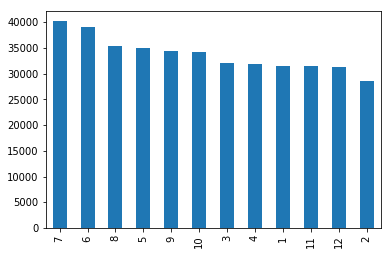

In [7]:
df['MONTH'].value_counts().plot(kind='bar')

In [12]:
df['date'] = df['OCCURRED_ON_DATE'].apply(lambda x: date_split(x))

In [13]:
df['time'] = df['OCCURRED_ON_DATE'].apply(lambda x: time_split(x))

In [14]:
df[['date','time']].head(5)

,date,time
0,2019-07-20,21:49:00
1,2019-07-20,20:07:00
2,2019-07-20,20:43:00
3,2019-07-20,20:10:00
4,2019-07-20,18:38:00


In [32]:
df.groupby(['OFFENSE_CODE_GROUP']).sum()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
OFFENSE_CODE_GROUP,,,,,,
Aggravated Assault,4203116,20343392,66552,130092,3.971609e+05,-6.671070e+05
Aircraft,177954,114993,389,822,1.990475e+03,-3.339331e+03
Arson,97200,217824,705,1252,4.443958e+03,-7.463961e+03
Assembly or Gathering Violations,3677592,2244500,7605,11970,4.470032e+04,-7.507534e+04
Auto Theft,4247124,11877175,40180,80526,2.323262e+05,-3.902497e+05
Auto Theft Recovery,967995,2656449,8493,16448,5.154516e+04,-8.657345e+04
Ballistics,3319514,2515149,8572,15700,5.043192e+04,-8.473161e+04
Biological Threat,5344,4034,21,23,8.471899e+01,-1.421185e+02
Bomb Hoax,285984,217814,700,1407,4.318894e+03,-7.250117e+03


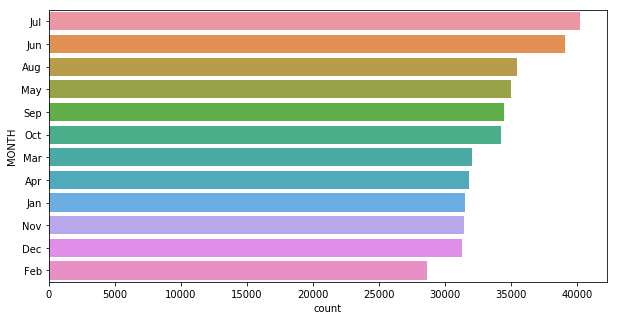

In [16]:
df['MONTH'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
plt.figure(figsize = (10, 5))
sns.countplot(y= 'MONTH', data = df, order = df['MONTH'].value_counts().iloc[:12].index)

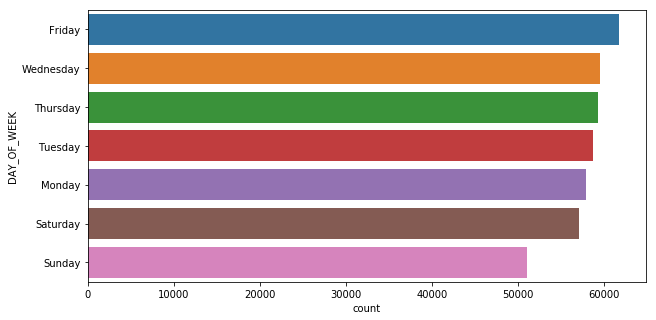

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(y='DAY_OF_WEEK', data=df, order=df['DAY_OF_WEEK'].value_counts().iloc[:7].index)

In [18]:
print(max(df.date))
print(min(df.date))

2019-07-20
2015-06-15


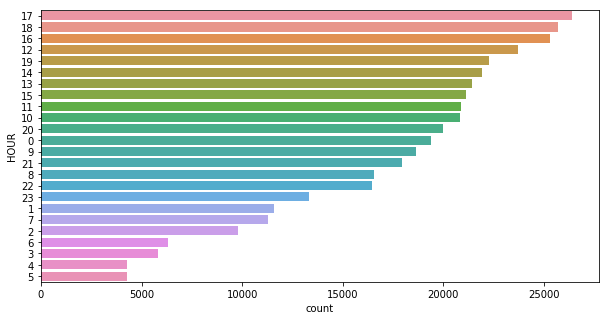

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(y='HOUR', data=df, order=df['HOUR'].value_counts().iloc[:24].index)

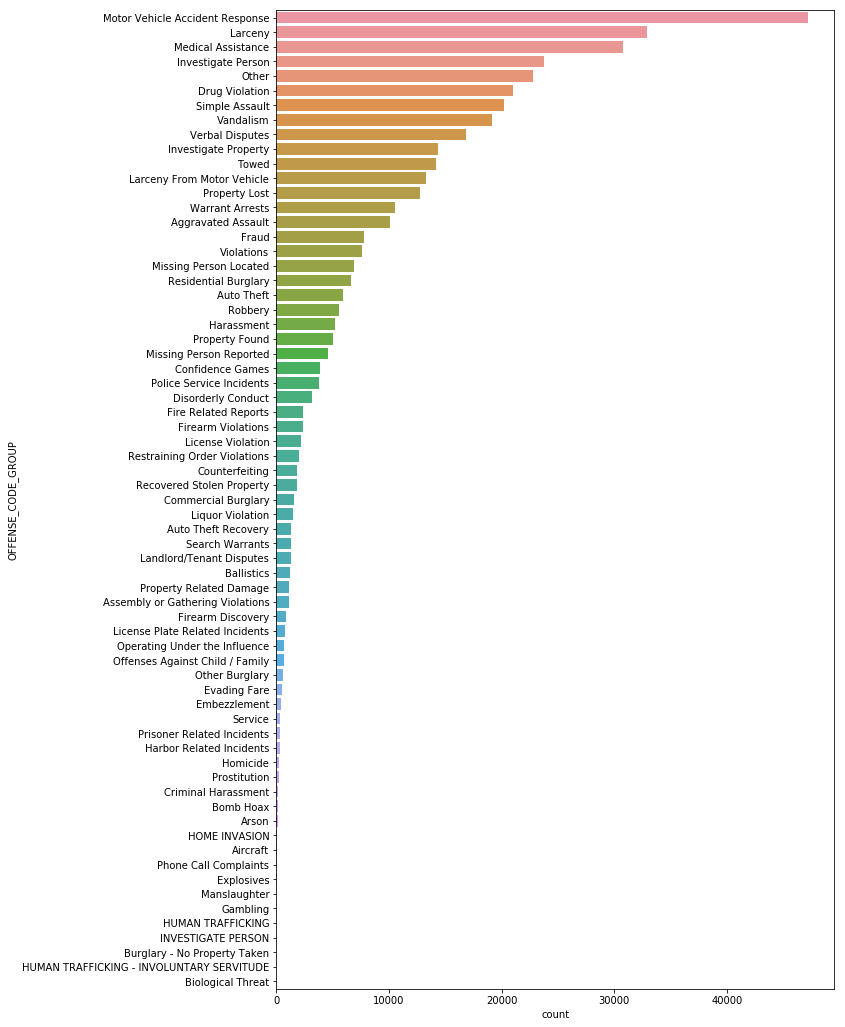

In [20]:
plt.figure(figsize = (10,18))
sns.countplot(y='OFFENSE_CODE_GROUP', data=df, order=df['OFFENSE_CODE_GROUP'].value_counts().iloc[:100].index)

In [25]:
df[~df['OFFENSE_CODE_GROUP'].isin(['Motor Vehicle Accident Response','Medical Assistance'])]['OFFENSE_CODE_GROUP'].value_counts()

Larceny                                      32908
Investigate Person                           23734
Other                                        22790
Drug Violation                               21005
Simple Assault                               20236
Vandalism                                    19105
Verbal Disputes                              16868
Investigate Property                         14363
Towed                                        14208
Larceny From Motor Vehicle                   13256
Property Lost                                12766
Warrant Arrests                              10558
Aggravated Assault                           10086
Fraud                                         7789
Violations                                    7613
Missing Person Located                        6852
Residential Burglary                          6599
Auto Theft                                    5889
Robbery                                       5541
Harassment                     

In [22]:
df.shape

(405254, 19)

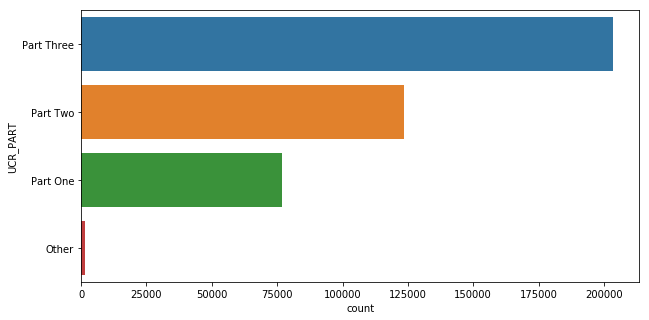

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(y='UCR_PART', data=df, order=df['UCR_PART'].value_counts().iloc[:8].index)

In [29]:
df['SHOOTING'].value_counts()

Y    1653
Name: SHOOTING, dtype: int64

In [31]:
df[df.SHOOTING == 'Y']['OFFENSE_CODE_GROUP'].value_counts()

Aggravated Assault                 788
Homicide                           217
Warrant Arrests                    134
Firearm Violations                 125
Ballistics                          66
Drug Violation                      55
Search Warrants                     51
Medical Assistance                  38
Robbery                             26
Other                               24
Investigate Property                24
Vandalism                           23
Investigate Person                  13
Motor Vehicle Accident Response     12
HOME INVASION                       10
Towed                               10
Firearm Discovery                    7
Simple Assault                       5
Property Found                       5
Missing Person Located               4
Recovered Stolen Property            3
Police Service Incidents             3
Disorderly Conduct                   3
Violations                           2
Property Lost                        2
Property Related Damage  